In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from plotly import express
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import arrow

import arrow
import warnings

In [2]:
df = pd.read_csv('train.csv',index_col=["Id"])
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:

test_df = pd.read_csv("test.csv")

In [15]:
TARGET = 'SalePrice'
keys = [column for column, dtype in df.drop(columns=[TARGET]).dtypes.items() if str(dtype) in {'int64', 'float64'}]
numerical_columns = [key for key in keys if test_df[key].isna().sum() == 0]

In [5]:
print(df[numerical_columns].isna().sum())

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64


In [6]:
import arrow
from umap.umap_ import UMAP
import pandas as pd
import plotly.express as express


2024-05-19 20:35:18.798118: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-19 20:35:19.057686: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 20:35:19.057744: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 20:35:19.091430: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-19 20:35:19.170514: I tensorflow/core/platform/cpu_feature_guar

In [17]:
time_start = arrow.now()
reducer = UMAP(
    n_components=2,
    random_state=2024,
    transform_seed=2024,
    verbose=True,
    n_jobs=1,
    n_epochs=1000
)
umap_df = pd.DataFrame(
    data=reducer.fit_transform(X=df[numerical_columns]),
    columns=['x', 'y']
)
umap_df[TARGET] = df[TARGET].tolist()
express.scatter(
    data_frame=umap_df,
    x='x',
    y='y',
    color=TARGET,
).show()
print('UMAP done in {}'.format(arrow.now() - time_start))

UMAP(n_epochs=1000, n_jobs=1, random_state=2024, transform_seed=2024, verbose=True)
Sun May 19 21:21:39 2024 Construct fuzzy simplicial set
Sun May 19 21:21:41 2024 Finding Nearest Neighbors
Sun May 19 21:21:41 2024 Finished Nearest Neighbor Search
Sun May 19 21:21:41 2024 Construct embedding


Epochs completed:   0%|            0/1000 [00:00]

	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Sun May 19 21:21:47 2024 Finished embedding


UMAP done in 0:00:08.017414


In [8]:
warnings.filterwarnings(action='ignore', category=FutureWarning)
train_plot_df = umap_df.drop(columns=[TARGET])
train_plot_df['data'] = 'train'
test_plot_df = pd.DataFrame(
    data=reducer.transform(X=test_df[numerical_columns]),
    columns=['x', 'y']
)
test_plot_df['data'] = 'test'
plot_df = pd.concat(objs=[train_plot_df, test_plot_df])
express.scatter(
    data_frame=plot_df,
    x='x',
    y='y',
    color='data'
).show()

Epochs completed:   0%|            0/333 [00:00]

	completed  0  /  333 epochs
	completed  33  /  333 epochs
	completed  66  /  333 epochs
	completed  99  /  333 epochs
	completed  132  /  333 epochs
	completed  165  /  333 epochs
	completed  198  /  333 epochs
	completed  231  /  333 epochs
	completed  264  /  333 epochs
	completed  297  /  333 epochs
	completed  330  /  333 epochs


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[numerical_columns], df[TARGET], test_size=0.20, random_state=20)
Model = Ridge(tol=1e-4, solver='lbfgs', random_state=2024, max_iter=10000, positive=True)
Model.fit(X_train, y_train)
print('rmse: {:5.4f}'.format(mean_squared_error(y_true=np.log(y_test), y_pred=np.log(Model.predict(X_test)), squared=False)))

rmse: 0.1858


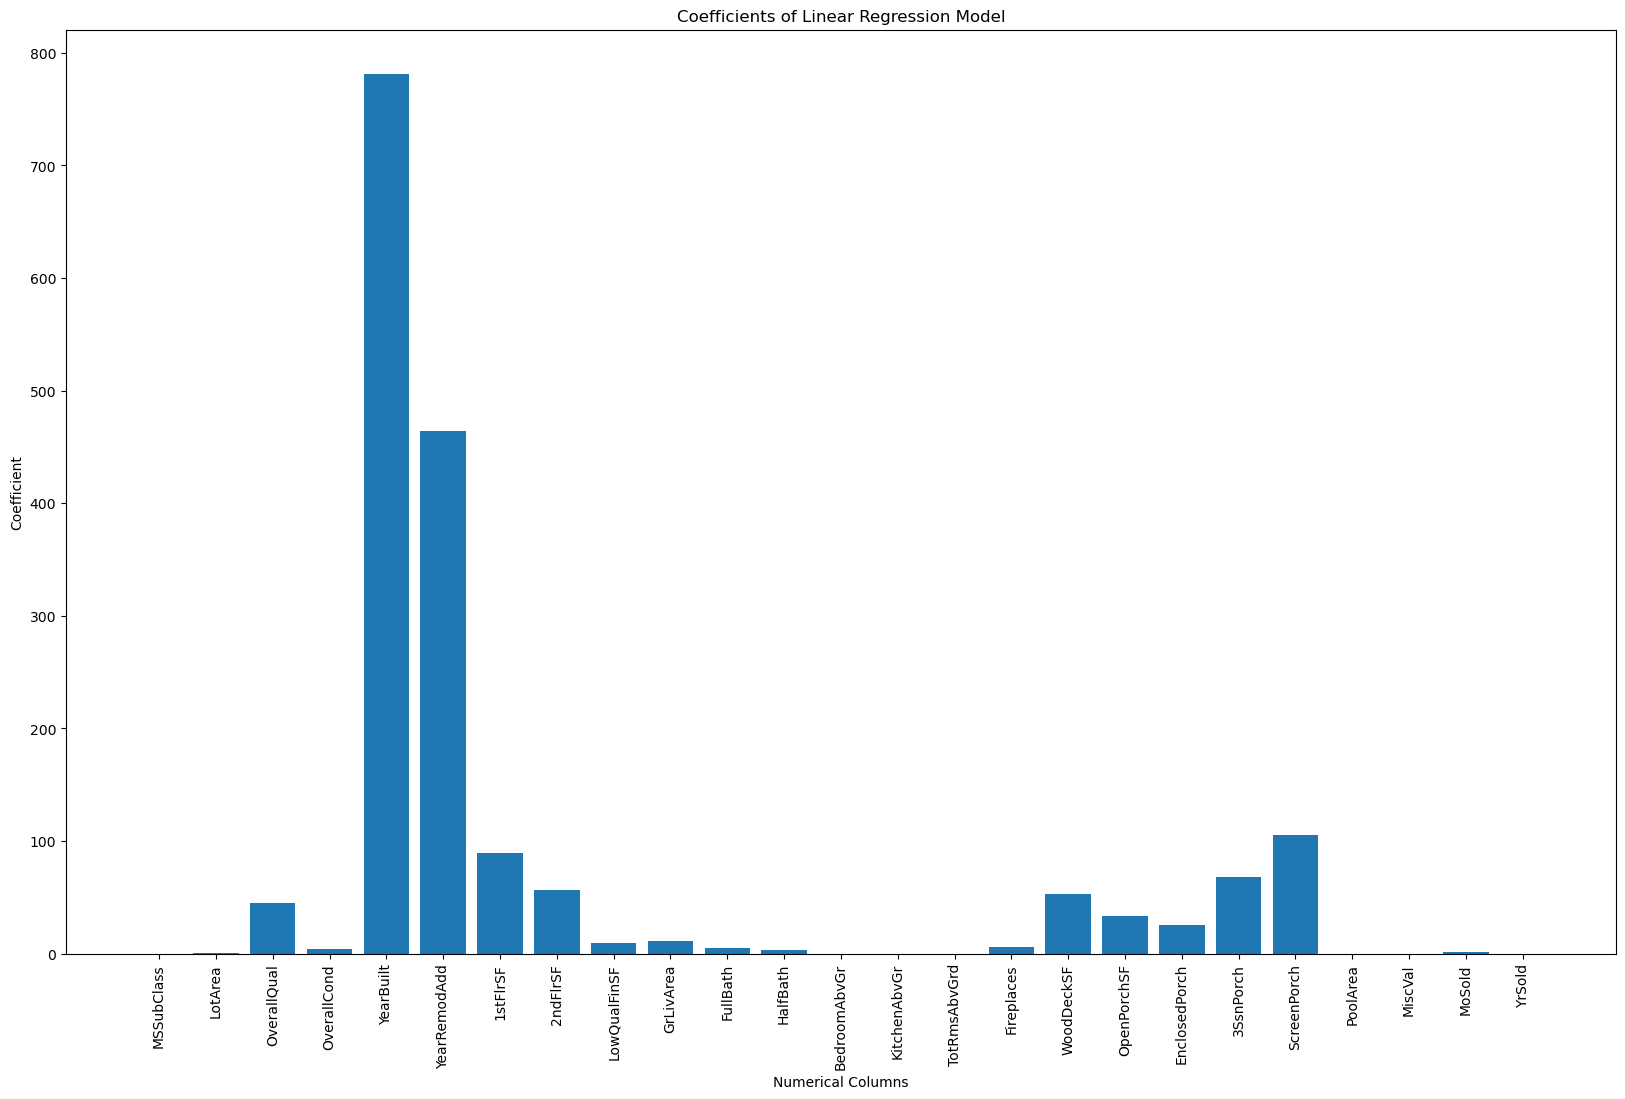

In [10]:
plt.figure(figsize=(20, 12))
plt.bar(numerical_columns, Model.coef_)
plt.xlabel('Numerical Columns')
plt.ylabel('Coefficient')
plt.title('Coefficients of Linear Regression Model')
plt.xticks(rotation=90)
plt.show()

In [11]:
scores = []
name = "Ridge"
for random_state in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df[numerical_columns], df[TARGET], test_size=0.20, random_state=random_state)
    Model.fit(X=X_train, y=y_train)
    y_pred = Model.predict(X=X_test)
    score = mean_squared_error(y_true=np.log(y_test), y_pred=np.log(Model.predict(X_test)), squared=False)
    scores.append(score)

title = 'score: {:5.4f} model: {}'.format(sum(scores)/len(scores), name)
scores_df = pd.DataFrame(data=scores, columns=['score'])
scores_df['mean'] = scores_df['score'].expanding().mean()

express.line(
    data_frame=scores_df,
    y=['score', 'mean'],
    title=title
).show()

In [14]:
y_tree_pred = Model.fit(X=df[numerical_columns], y=df[TARGET]).predict(X=test_df[numerical_columns])
y_tree_pred


array([120713.26556886, 164139.5211828 , 210761.74668632, ...,
       177404.79668124, 151598.53157405, 231835.35740204])